<a href="https://colab.research.google.com/github/ShrabonBoss/OCSRC/blob/main/test_model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
import random
import zipfile
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.layers import Input, Lambda, Dense, Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,Activation
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

ImportError: cannot import name 'is_tensor_or_tensor_list' from 'keras.src.utils.tf_utils' (/usr/local/lib/python3.10/dist-packages/keras/src/utils/tf_utils.py)

In [ ]:
source_path = 'drive/MyDrive/RiceLeafsV1'

# train source
source_path_train_Brownspot = os.path.join(source_path, 'train/BrownSpot')
source_path_train_Healthy   = os.path.join(source_path, 'train/Healthy')
source_path_train_Hispa     = os.path.join(source_path, 'train/Hispa')
source_path_train_LeafBlast = os.path.join(source_path, 'train/LeafBlast')

print(f"There are {len(os.listdir(source_path_train_Brownspot))} images of Train Brown Spot.")
print(f"There are {len(os.listdir(source_path_train_Healthy))} images of Train Healthy.")
print(f"There are {len(os.listdir(source_path_train_Hispa))} images of Train Hispa.")
print(f"There are {len(os.listdir(source_path_train_LeafBlast))} images of Train LeafBlast.\n")

# Validation source
source_path_validation_Brownspot  = os.path.join(source_path, 'validation/BrownSpot')
source_path_validation_Healthy    = os.path.join(source_path, 'validation/Healthy')
source_path_validation_Hispa      = os.path.join(source_path, 'validation/Hispa')
source_path_validation_LeafBlast  = os.path.join(source_path, 'validation/LeafBlast')

print(f"There are {len(os.listdir(source_path_validation_Brownspot))} images of Validation Brown Spot.")
print(f"There are {len(os.listdir(source_path_validation_Healthy))} images of Validation Healthy.")
print(f"There are {len(os.listdir(source_path_validation_Hispa))} images of Validation Hispa.")
print(f"There are {len(os.listdir(source_path_validation_LeafBlast))} images of Validation LeafBlast.\n")

There are 100 images of Train Brown Spot.
There are 100 images of Train Healthy.
There are 100 images of Train Hispa.
There are 100 images of Train LeafBlast.

There are 60 images of Validation Brown Spot.
There are 60 images of Validation Healthy.
There are 60 images of Validation Hispa.
There are 60 images of Validation LeafBlast.



Sample Testing Healthy Rice Leaf:


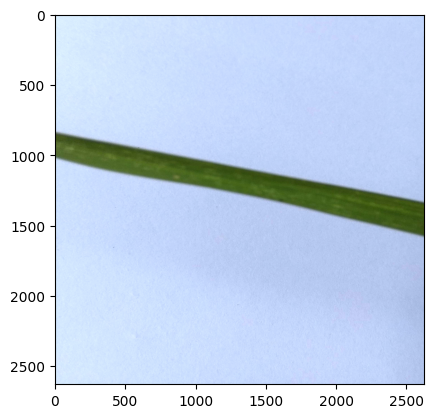

Sample Testing LeafBlast Rice Leaf:


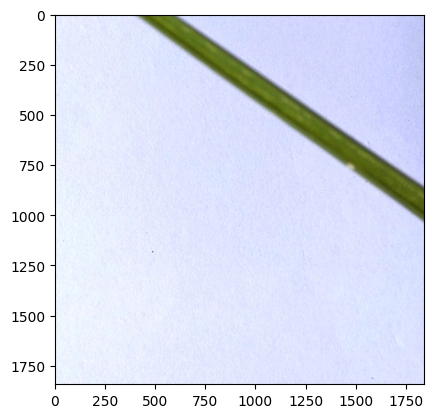

In [ ]:
random_number = random.randint(0, len(os.listdir(source_path_validation_Hispa)))
print("Sample Testing Healthy Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_Healthy, os.listdir(source_path_train_Healthy)[random_number])}"))
plt.show()

print("Sample Testing LeafBlast Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_LeafBlast , os.listdir(source_path_train_LeafBlast )[random_number])}"))
plt.show()

In [ ]:
TRAINING_DIR = os.path.join(source_path, 'train')
VALIDATION_DIR = os.path.join(source_path, 'validation')

In [ ]:
dataset = []
shape = (224, 224)
count = 0
for file in os.listdir(TRAINING_DIR):
  path = os.path.join(TRAINING_DIR, file)
  time = 0
  for k in os.listdir(path):
    image   = load_img(os.path.join(path, k), grayscale=False, color_mode='rgb', target_size = shape)
    image   = img_to_array(image)
    image   = image/255.0
    dataset += [[image, count]]
    time    +=1
  count = count+1

In [ ]:
testset=[]
count=0
for file in os.listdir(VALIDATION_DIR):
    path=os.path.join(VALIDATION_DIR,file)
    t=0
    for im in os.listdir(path):
        image    = load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=shape)
        image    = img_to_array(image)
        image    = image/255.0
        testset  += [[image,count]]
        t        += 1
    count        = count+1

In [ ]:
data,trainlabels = zip(*dataset)
test,testlabels = zip(*testset)

labels1 = to_categorical(trainlabels)
labels  = np.array(labels1)

data    = np.array(data)
test    = np.array(test)

trainx, testx, trainy, testy = train_test_split(data,
                                                labels,
                                                test_size=0.2,
                                                random_state=42)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(320, 224, 224, 3)
(80, 224, 224, 3)
(320, 4)
(80, 4)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier


# Check shapes before splitting (optional)
print("x_train shape before splitting:", trainx.shape)
print("y_train shape before splitting:", trainy.shape)

# Impute missing values in y_train (assuming labels are a single column)
imputer = SimpleImputer(strategy='mean')  # Replace with a suitable strategy
x_train = imputer.fit_transform(trainx.reshape(-1, 1))
y_train = imputer.fit_transform(trainy.reshape(-1, 1))

# Check shapes before splitting (optional)
print("x_train shape before splitting:", x_train.shape)
print("y_train shape before splitting:", y_train.shape)

# Now fit the KNN model
knn.fit(x_train, y_train)

# Evaluate performance (accuracy in this example)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

x_train shape before splitting: (320, 224, 224, 3)
y_train shape before splitting: (320, 4)
x_train shape before splitting: (48168960, 1)
y_train shape before splitting: (1280, 1)


ValueError: Found input variables with inconsistent numbers of samples: [48168960, 1280]

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=30,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.2,
                             shear_range=0.2)

In [ ]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(224,224,3),
                                                      include_top=False,
                                                      weights='imagenet')

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
pretrained_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']

In [ ]:
inputs = pretrained_model.input
x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
his=model.fit(train_datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=16, verbose=0)

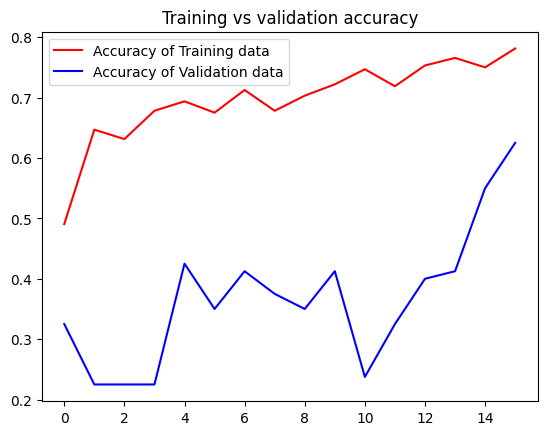

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
import pathlib
tflite_models_dir = pathlib.Path("drive/MyDrive/model")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
tflite_model_file = tflite_models_dir/"model.tflite"
tflite_model_file.write_bytes(tflite_model)

233430772

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
tflite_model_quant_file = tflite_models_dir/"model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_quant_model)

58793080

In [4]:
!ls -lh {tflite_models_dir}

ls: cannot access '{tflite_models_dir}': No such file or directory


Convert the Model to Tensorflow.js

In [6]:
!pip install tensorflowjs --ignore-installed


  Using cached tensorflowjs-4.18.0-py3-none-any.whl (89 kB)
  Using cached flax-0.8.3-py3-none-any.whl (685 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached jax-0.4.26-py3-none-any.whl (1.9 MB)
  Using cached jaxlib-0.4.26-cp310-cp310-manylinux2014_x86_64.whl (78.8 MB)
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tf_keras-2.16.0-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_decision_forests-1.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.5 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached msgpack-1.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (385 kB)
  Using cached optax-0.2.2-py3-none-any.whl (2

In [3]:
!tensorflowjs_converter --input_format keras model/model_quant.tflite tfjs/model


2024-04-30 15:19:20.341523: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 15:19:21.830481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 37, in <m

In [8]:
pip install --upgrade ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 816.5/816.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.24.0 which is incompatible.


In [7]:
!ls drive/MyDrive/model

model_quant.tflite  model.tflite
